In [44]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from os import path
import acquire_titanic
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import math
import split_scale



In [5]:
from pydataset import data

iris = data('iris')
iris
print(iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [7]:
print(iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [10]:
print(iris.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


In [12]:
print(iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
customer_df = pd.read_excel('Excel_Exercises.xlsx', sheet_name=0)

In [14]:
df_excel_sample = customer_df.head(100)

In [15]:
customer_df.shape[0]

7049

In [16]:
df_excel_sample.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [17]:
df_excel_sample.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [18]:
df_excel_sample.dtypes[df_excel_sample.dtypes == 'object']

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

In [19]:
[df_excel_sample.dtypes == 'int64'] or [df_excel_sample.dtypes == 'float64']
df_excel_sample.dtypes[df_excel_sample.dtypes != 'object']
df_excel_sample.select_dtypes(['int64', 'float64']).max() - df_excel_sample.select_dtypes(['int64', 'float64']).min()

is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges        97.40
total_charges        8476.85
dtype: float64

In [20]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [21]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
df_google.shape


(891, 12)

In [23]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
df_google.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [26]:
df_google.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [27]:
df_google.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [28]:
df_google.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
df_google.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [30]:
df_google.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [31]:
df_google.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
df_google.Name.describe()

count                     891
unique                    891
top       Johnson, Mr. Alfred
freq                        1
Name: Name, dtype: object

In [33]:
df_google.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [34]:
df_google.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [35]:
df_google.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
from pydataset import data

iris = data('iris')
iris
print(iris.head(3))
df = iris

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [12]:
train_df, test_df = split_scale.train_test_split(
    df, test_size=.30, random_state=123)

train_df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

# Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

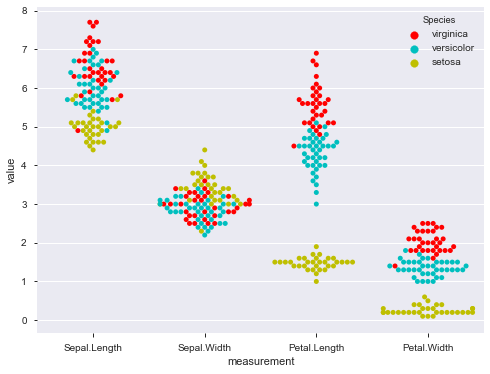

In [70]:
df_melt = pd.melt(train_df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species']], "Species", var_name="measurement")
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="Species",
              palette=["r", "c", "y"], data=df_melt)
# p.set(yscale="log")
plt.show()








# Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width

petal_length x petal_width


sepal_area x petal_area

sepal_length x petal_length

Make your figure size 14 x 8. What are your takeaways?

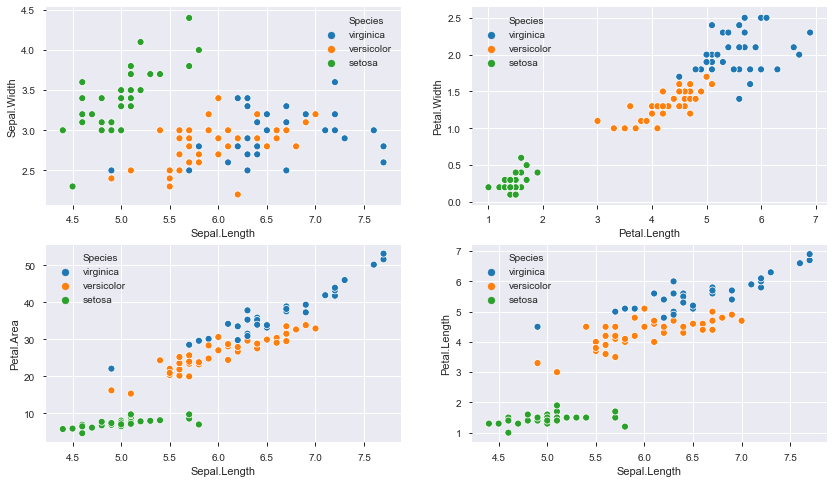

In [71]:
train_df['Sepal.Area'] = train_df['Sepal.Width'] * train_df['Sepal.Length']
train_df['Petal.Area'] = train_df['Petal.Length'] * train_df['Sepal.Length']
train_df.head()
import numpy as np
ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))[1]

sns.scatterplot('Sepal.Length', 'Sepal.Width', hue='Species', data=train_df, ax=ax[0][0])
sns.scatterplot('Petal.Length', 'Petal.Width', hue='Species', data=train_df, ax=ax[0][1])
sns.scatterplot('Sepal.Length', 'Petal.Area', hue='Species', data=train_df, ax=ax[1][0])
sns.scatterplot('Sepal.Length', 'Petal.Length', hue='Species', data=train_df, ax=ax[1][1])

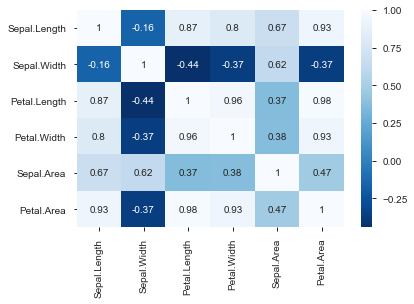

In [72]:
sns.heatmap(train_df.corr(),annot=True,cmap='Blues_r')

H0: the difference in sepal length between virginica and versicolor is insignificant.


Ha: the difference in sepal length between virginica and versicolor is significant.

In [79]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train_df[train_df['Species'] == 'virginica']['Sepal.Length'].dropna(),
    train_df[train_df['Species'] == 'versicolor']['Sepal.Length'].dropna())



Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

# We reject the null hypothesis